# Informatics 1 Cognitive Science - Assignment 2

------------------------

## Academic misconduct

This assignment is intended to be completed individually. Please make sure you are familiar with the [school's academic misconduct policy](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct).

## Answering questions

The assignment notebooks include a combination of instructions, code that has been written for you to use, run, or examine, and questions you need to answer.

### Code

In every place where you need to write code you will see:

    # YOUR CODE HERE

Delete any raise NotImplementedError() (if applicable) and write your solution code inside the marked cell.

In general, you should write your solutions so the notebook can be run from start-to-finish, from scratch. To check this, you can open the "Kernel" menu above and select "restart and run all". This will restart the kernel and run all cells from first to last.

### Text

For questions that require you to write text the cell will say `YOUR ANSWER HERE`. Again delete that line if you want to answer the question and write your response in the marked cell.

Most of the cells that already contained text or calculations will be read-only. You can open new cells for additional calculation or notes, but please try to give answers in the requested cells wherever possible.


## Marking

Please consult the [Common Marking Scheme](https://web.inf.ed.ac.uk/infweb/student-services/ito/students/common-marking-scheme) for information how we mark coursework. In particular note that a mark above 75% requires the following: *Connections have been made both within and beyond the brief. Learning can be applied to unfamiliar situations or problems and may extend current theory. It is questioning, speculative and reflective.* 

This will be assessed, in part, using your text answers, so please pay attention to these, and not just the coding parts. In the tex answers we will be looking for evidence of sound understanding of the subject matter. Marks above 80% document evidence of original, independent thinking. In other words, think about relevant context when giving your answers, but remain focussed on the question. Remember, it's quality, not quantity, that matters for a good answer. Also note that we will not mark your coding style. Any coding question will receive full marks if it produces the requested result.

In [1]:
# imports required for all tasks

# import numpy, the python scientific package
import numpy as np

# import maplotlib to plot the visualizations
from matplotlib import pyplot as plt
#this is to output the plots in the notebook
%matplotlib inline

# Let's also hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Part 1
## Similarity-based models of categorization. (25 points)

In [2]:
# Here we use the following functions:

#x and y must be the same shape/ equal no. of elems 
#subtract corresponding elems and sqaure results, sum the final array and make -ve by mult by -c
#final: e^(ans*-1)
def similarity(x,y,c): 
    return np.exp(-c*np.sum(np.power((x-y),2)))

def similarityToAll(x,yM,c):
    xM=np.tile(x,[np.size(yM,axis=0),1]) # np.tile( x , y where y= [no. of rows, 1] )... entries will be same
    #but x repeated no. of rows times 
    sqDiff = np.power(xM-yM,2)
    ssDiff=np.sum(sqDiff,axis=1) #adds the column entries in each array
    return np.exp(-c*ssDiff) #calculates e^x for each value of x in ssDiff

def model1(testCase,cat1,cat2,c):
    c1s = np.sum(similarityToAll(testCase,cat1,c)) #compares category1 to testCase
    c2s = np.sum(similarityToAll(testCase,cat2,c)) #compares category2 to testCase
    return c1s/(c1s+c2s)

def model2(testCase,cat1,cat2,c):
    c1s = similarity(testCase,np.average(cat1,axis=0),c)
    c2s = similarity(testCase,np.average(cat2,axis=0),c)
    return c1s/(c1s+c2s)


<div class="alert alert-info" role="alert">
<h1>Exercise 1a)</h1>
<p>
First, let's understand what $c$ does -- it's a parameter we can adjust to change the way our similiarity function behaves. Suppose we have three examples, x1=[1, 1], x2=[1,0], and x3=[1,3].

1. What happens to the relative similarity of x1 to x2 and x3 as we let c become very large? (1 point)
2. What happens if we let c become very close to zero? (1 point)
3. Why shouldn't we let c be negative? (1 point)
    
(3 points total)
</p>
</div>


In [3]:
#IGNORE - just testing a few things
x1=np.array([1,1])
x2=np.array([4,4])
x3=np.array([1,3])
sim1 = similarityToAll(x1,x2,1)


#### Ans 1 
As c becomes very large, the similarity function tends to 0. 
#### Ans 2 
As c becomes very close to 0 (almost 0), the similarity function outputs values very close to 1.
#### Ans 3 
That will reverse the sign of $x$ in $e^{x}$ function spitting out the wrong results as it will be equivalent to raising the exponential function to a positive value instead of a negative.This also means the values will no longer be restricted between 0 to 1, thereby the classification model will not function correctly.

<div class="alert alert-info" role="alert">
<h1>Exercise 1b)</h1>
<p>
    
Second, let's look at some simple models. Two functions in the block above, model1 and model2, describe minimal versions of categorization models we have discussed in lecture.

4. Which categorization model does model1 best correspond to? Explain. (2 points)
5. Which categorization model does model2 best correspond to? Explain. (2 points)

(4 points total)    
</p>
</div>


In [4]:
#IGNORE - just testing a few things
x1=np.array([1,1])
x2=np.array([1,0])
#x3=np.array([1,3])
simAll = similarityToAll(x1,x2,1)
#b = similarityToAll(x1,x3,1)


ANSWERS:

One way to talk about concepts ( restricted to the kind that has some sort of categories) is - it's not about definitions, it is about similarity or resemblance. This can then be implemented as similarity-based models of categorisation. The major contributors to these theories are: Ludwig Wittgenstein and Eleanor Rosch.

#### Ans 4
Model 1 is a minimal version of **Exemplar theory** because the model keeps all the exemplars which are recorded as arrays in the implementation above. In this case, a comparison is made with each of the arrays *instead of* taking an average of all the observations of previous exemplars. 

#### Ans 5
Model 2 is a minimal version of **Prototype theory** because prototypes are treated as averages of all the previous observations. In this implementation, average is taken of all the elements per row since axis=0. Then each average is comapred with the corresponding row in testCase to model the respective similarity. 


Third, let's consider the problem of categorizing a new creature, named Bob, as a wimble or as a womble. The only features our creatures can have are volume and mass; a creature with a volume of $1cm^3$ and a mass of $2g$  can be described as [1 2].

The next block describes previously-observed wimbles and wombles in terms of these features, as well a new creature, which we will call Bob. For the rest of these questions, assume $c=0.1$.


In [5]:
#wimbles = np.matrix([[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10],[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10],[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10],[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10],[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10],[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10],[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10],[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10],[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10],[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10]])
wimbles = np.matrix([[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10]])
wombles = np.matrix([[1,5.01],[1,5.02],[1,5.03],[1,5.04],[1,5.05],[1,5.06],[1,5.07],[1,5.08]])

bob = np.array([1,5.5])



<div class="alert alert-info" role="alert">
<h1>Exercise 1c)</h1>
<p>
 
6. Does Model 1 classify Bob as a wimble or a womble? Why? (3 points)
7. Does Model 2 classify Bob as a wimble or a womble? Why? (3 points)
8. Suppose we next see 9 more groups of wimbles, all identical to the group above. What changes in the models' predictions? Explain. (3 points)
9. Is it *reasonable* for the predictions to change if we see many more examples of one category than another? Explain. (3 points)
    
(12 points total)
</p>
</div>


#### Ans 6 and 7

In [6]:
#model1 function template:
    #model1(testCase,cat1,cat2,c)
        #c1s = cat1 calculations 
        #c2s = cat2 calculations
        #return c1s/(c1s+c2s) ... so the output is based on how similar cat1 is to the rest of the dataset.

print("Values range from 0-1 where 0 means least likely and 1 means most likely to be a WOMBLE\n")
mod1Class = model1(bob, wombles, wimbles, 0.1)
print("Model 1 - Likelihood of Bob being a womble is", mod1Class)

mod2Class = model2(bob, wombles, wimbles, 0.1)
print("Model 2 - Likelihood of Bob being a womble is", mod2Class)

Values range from 0-1 where 0 means least likely and 1 means most likely to be a WOMBLE

Model 1 - Likelihood of Bob being a womble is 0.8812422833749054
Model 2 - Likelihood of Bob being a womble is 0.4948245598453498


##### Model 1 : Bob classified as womble
Model 1 classifies Bob as womble because model 1 works as per exemplar theory which "remembers" the previous instances/ exemplars and compares the new data point to the previous observations. Here, both wimbles and wombles have volume which is the same as Bob's volume but their masses differ. Since, model 1's classification depends on the most similar occurrence seen previously and Bob's mass is closest to wombles' mass, Bob is classified as womble. 
##### Model 2 : Bob classified as wimble
Model 2 classifies Bob as wimble because this model implementation is based on prototype theory where, in this case, the **average** mass taken from all previous occurences is **closer to wimbles' average mass than** the average of **wombles** mass. However, the output value is not decisively close to 0 for the classification to be strong as a wimble. This makes sense because all of the masses of wombles are in the ball park of 5 to 5.1 and that average would also be close to Bob's mass - 5.5. 
Since the volume is same amongst the wimbles, wombles and the new observation (Bob), the decisive factor is the differences in masses. 

#### Ans 8 

Adding 9 more wimbles would leave model 2's results unchanged and model 1's classification will become less strong as a womble. 

Model 2's results are unchanged as it's an implementation of prototype theory which is based on summarisation by averages. Adding more wimbles identical to the group previously seen means the average is not largely changed because mathematically, while there are more number of wimbles features to take average of, this is accounted for by taking into the frequency/number of individual wimbles observations. For example, (2+1)/2 is same as (2+1 + 2+1) /4. So, the classification confidence also remains identical to the previous one before adding more wimbles. 

Model 1's classification confidence becomes less strong as the implementation is based on exemplar theory which comapares the new data to all the previous instances. By adding 9 more sets of wimbles, there are more past examples influencing the model's behaviour, therey reducing its confidence. Since the wimbles group is repeated 9 more times, the model is more likely to learn that the mass of wimble is either 1g or 10g, so the classification leans towards Bob being a wimble. 

#### Ans 9

This is a problem of Imbalanced Classification where, in a classification predictive modeling problem, the distribution of examples across the classes is not equal.

If we see more examples of one category than the other, the model will have more data to learn about one category compared to others. This may lead to an inaccurate classification by the model since it has learned more features from one catgeory and less informed about others. Therefore, it is reasonable for predictions to change and be skewed. This must be accounted for in design decisons when sampling the data. 

<div class="alert alert-info" role="alert">
<h1>Exercise 1d)</h1>
<p>
    
Finally, let's consider some of the shortcomings of these models.

Suppose someone is playing a minimalist video game, and so far has only encountered the wimbles and wombles listed above. They are asked to make a judgement about what Bob is, without being given any guidance or restrictions about Bob's category or knowing what categories exist in the game.

10. What is one way both models above fail to account for human category judgments in this scenario, in terms of the kinds of information people consider, the judgments they make, and/or how they represent categories? Where possible, discuss specifics of the current example. (3 points)

11. In addition to the first failure, name a second one that a model in the Sanborn et al. paper fixes. That is, a problem faced by Model 1 or Model 2 above, but not (either) the MAP model or the particle filter in the Sanborn paper discussed in lecture. Explain. (3 points)

(6 points total)
</p>
</div>

#### Ans 10

One of the purpose of having categories is to explain the things we (humans) see in the world, make predictions and generalise. 
These models just capture the general purpose similarity. The kinds of demensions we care about when judging how similar two things are can *change*.  

When humans are playing a minimilist video game and they come across wimbles and wombles, humans are likely to *represent* the creatures in terms of their behavioural and anatomical features. However, the current model's implementation does not capture that. A human may *judge* a womble behaves differently to a wimble in the game and, learn and take into account that feature when concluding Bob's category. This may be evident in the way wimbles and wombles interact with each other in the game or differences in interaction with the user. 

This idea is based on *Heit, E., & Rubinstein, J. (1994). Similarity and property effects in inductive reasoning. Journal of Experimental Psychology: Learning, Memory, and Cognition, 20(2), 411–422*. 

 

#### Ans 11

The Sanborn et al. paper addresses some of the blind spots of exemplar and prototype models in it. The techniques mentioned in the paper are a unification of the models and gives a taste of modern computational models developed. The prototype and exemplar models do not account for any order effects that may be introduced. 


A failure addressed in particle filter model in Sanborn et al. paper is Order effects. When humans see stimuli in a different order, they make different judgements. That means humans will analyse information in a different way in the video game environment depending on if they say the wimbles or the wombles first. 
With an infinite number of particles, the particle filter model is a very faithful representation of the posterior distribution and thus does not introduce any order effects not intially present in the statistical model. This also effectively means that the order effects humans may have when seeing a wimble or a womble will be combatted by the model, thereby performing better than humans on a statistical level if there are infinitely many particles in a particle filter. However, this depends on the number of particles and they must be infinite for there to asymtomatically no order effects.

In addition, Sanborn et al. paper also fixes category variance. Instead of taking an average of all the observations and developing a prototype, particle filter model will be able to learn that wimbles have a mass of either 1g or 10g and nothing in between. This means any variation in Bob's features ( specifically, the mass since the volumes are 1 throughout in all categories ) will be respected. For example, the particle filter technique is more likely to classify Bob as a womble than a wimble because wombles have a varying mass whereas wimbles are strictly 1g or 10g. 

# Part 2
## Simple neuron models. (18 points)

The code below simulates two neuron models. You task is to compare these models.

You can run the cell and modify the code to inspect the two models. The code does not have to be in its original form when you submit, only the answers will be marked.

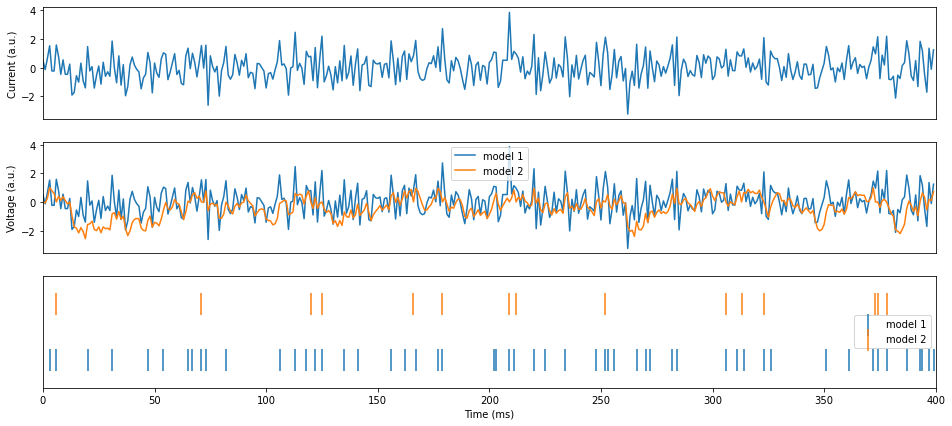

In [7]:
# Row 1: Model 1
# Row 2: Model 1 and 2 comparison
# Row 3: Model 1 and 2 spike trains

# Simulation parameters

# simulation time (in milliseconds)
t_max = 400

# Input current
np.random.seed(42) # fix random seed to 42 to aid reproducibility 
I = np.random.normal(size=t_max) #generates an array of size t_max (for each milisec 1-400)

# Spike threshold
threshold = 1

# Show the input current
plt.figure(figsize=(16,7))
plt.subplot(311) #3x1 grid - 1st subplot 
plt.plot(I)
plt.xlim(0,t_max) # from 0 to 400 milisecs
plt.xticks(())
plt.ylabel('Current (a.u.)')

# Compute voltage for model 2
V = np.zeros(t_max) # array of 400 zeros i.e. intially 0 at each milisecond 
spikes = []
for t in range(1,t_max): #starts from 1 since V[t-1] will be 0. 
    V[t] = V[t-1] + 1/10 * (-V[t-1] + 5*I[t])
    if V[t]>threshold:
        spikes.append(t)
        V[t] = 0 # neuron driven back to resting potential after a spike

# Neuron activation (voltage) for both models
plt.subplot(312) #3x1 grid - 2nd subplot 
plt.plot(I, label='model 1')
plt.plot(V, label='model 2')
plt.xlim(0,t_max)
plt.xticks(())
plt.ylabel('Voltage (a.u.)')
plt.legend()

# Spike trains generated by both models
plt.subplot(313) #3x1 grid - 3rd subplot 

# spikes plotted at times - print(np.where(I>threshold)[0])
plt.scatter(np.where(I>threshold)[0], np.zeros(np.sum(I>threshold)), marker='|', s=500, label='model 1')

# spikes plotted at times - print(spikes)
plt.scatter(spikes, np.ones(len(spikes)), marker='|', s=500, label='model 2') 

plt.xlim(0,t_max)
plt.ylim(-.5,1.5)
plt.yticks(())
plt.xlabel('Time (ms)')
plt.legend();

<div class="alert alert-info" role="alert">
<h1>Exercise 2a)</h1>
<p>
Give the name and equation(s) for each model, and explain how each model works.
    
Note you can write LaTeX code enclosing expressions in the single or double dollar sign, e.g. $x^2$
    (6 points)
</p>
</div>

### Model 1:
**The McCulloch-Pitts Neuron**

$I = I(t)$ 

For each time step,
$I$ is the current which models the firing of the neuron if $I > threshold$
where the threshold = 1.


The model replicates the idea that a neuron exists in one of the two states, on(spiking) or off. This binary neuron is the first ever mathematical model of a biological neuron which is implemented as a step function. 
More generally, in other variations of the model, the neurons can be connected by directed, weighted paths. If $I$ > threshold, then the connected path is said to be excitatory else it is known as inhibitory. That is, if the net input to the neuron is greater than the threshold, it fires.

Moreover, apart from modelling a neuron, the McCulloch-Pitts model can also represent boolean functions which are linearly separable but, not XOR since it is not linearly separable. 

### Model 2: 
**The Integrate and Fire Neuron**

$V(t)=V(t-1)+\frac{1}{10}\left[-V(t-1)+5*I_{e x t}(t)\right]$

for each time step ($t$), if $V(t)$ > threshold then $Spike$ and $V(t) = {V_{reset}}$ where ${V_{reset}}$ = 0.

Parameters: $1$ simulates the small time step and $10$ simulates membrane time constant, $5*I(t)$ simulates an external input e.g. a current from the synapses. 

The model works by modelling membrane potential along with a spiking mechanism. The additional spiking mechanism helps to model the evolution of membrane potential below spiking threshold in more detail. The model is implemented by creating an array of 400 zeros, each representing 1 milisecond out of the 400 miliseconds. For each time step, if the potential/voltage is higher than the threshold, then that time will be recorded by appending it to the spikes array. After each action potential/spike, the neuron is driven back to the resting potential i.e. V[t] = 0. 


<div class="alert alert-info" role="alert">
<h1>Exercise 2b)</h1>
<p>
Explain how the spiking differs between the two models, and explain which components of the model cause those differences.
    (6 points)
</p>
</div>

**The McCulloch-Pitts Neuron**

In the McCulloch-Pitts neuron model, the subsequent spiking does not take into consideration the previous spikes. Since the output is computed at every time stamp just from the current time's external input, this neuron model has no memory of its past activity. This is reflected in the implementation as the previous activity does not enter the equation/ code. Therefore, there is a spike every time the current is above the threshold. According to Dale's Law, each neuron can make only either excitatory or inhibitory synapses. Since, past acitivity is not saved in McCulloch-Pitts model of the neuron, the model *only* displays a spike when the neuron's **current** net synapse is excitatory **and** above the threshold. 

**The Integrate and Fire Neuron**

In the Integrate and Fire Neuron model, a neuron can be modelled as an integrator i.e., can count the number of spikes coming in a short time interval. This means, unlike the previous model, the spiking is affected by temporal summation and spatial summation. For temporal summation, few excitatory stimuli **occuring close together** in time can cause excitatory postsynaptic potential (EPSPs) when added together. For spatial summation, few **simultaneous** stimuli at different locations can cause EPSPs when added together. These temporal and spacial summations elicit a spike. However, the time interval must be close/short for the previous synapse to be considered and even if, the current synpase is excitatory, any Inhibitory postsynaptic potential (IPSP) in the recent past can cancel the effect of current synpase, thereby supressing the firing. 

Therefore, the main difference is whether the spiking is affected by activity just from the current input or activity within a short time interval. 

<div class="alert alert-info" role="alert">
<h1>Exercise 2c)</h1>
<p>
Explain which aspects of the activity of real neurons are captured by each model, and which are missing.
    (6 points)
</p>
</div>

### Activities captured and missing from:

Since the The McCulloch-Pitts Neuron is the very first mathematical model of the neuron, it is extremely simplified version of the biological neuron. The Integrate and Fire Neuron is an improvement, however, the real neuron is far more complex and some of the **missing features** include: 

 - For McCulloch-Pitts Neuron model, modelling the acitivity from neurons/neuron synapses that occured in the last few seconds which the Integrate and Fire neuron does. Therefore, integrate and fire model dynamics may be useful in performing tasks that require memory, such as the counting task.
 - The McCulloch-Pitts Neuron model cannot model non-binary inputs and outputs which the biological neuron can. 
 - The number of neurons/ inputs that BOTH these models can take is much less than our actual brain. When applying these models in Machine Learning tasks, the limitation in size isn’t just computational: simply increasing the number of layers and artificial neurons does not always yield better results. 
 - In both the models, the various ions channels which mediate the potential changes is not modelled/ taken into account. 
 - These models cannot mimic the creation nor the destruction of connections ( dendrites or axons ) between neurons, and ignores signal timing unlike an actual neuron in our brain.  
 - A drawback of Integrate and Fire model is that it accumulates and affects the next input until the total input passes a threshold and is then only reset to V[t] = 0. However, this is not how a biological neuron works since the mechanism to generate action potetial is far more complex. 
 - The synaptic transmission between neurons is largely stochastic process. If a synapse is stimulated twice, there is a slightly different respose each time. However, stochasticity is missing from McCulloch-Pitts Neuron model.   
 - Some neurons in vivo fire regularly. But in the cortex, the timing of successive action potentials is highly irregular. ndout). One of the main problems with the integrate-and-fire model is that it is too deterministic, hence inconsistent with the behavior of in vivo cortical neurons. This problem can be partially overcome by adding lots of noisy. 

On the contrary, the **features captured** include: 
- Both the models can capture thresholding, even though it is not optimally smooth thresholding as biological neurons do. However, an action potential (spike) is modelled well when the membrane potential reaches a threshold. 

It is worth knowing that McCulloch-Pitts model tend to be overlooked in favour of “gradient descent” neural networks. McCulloch-Pitts neurons are similar to the approach seen in neuromorphic chips where neurons are used as computational units. It is interesting to note that they are used as components of computer-like systems. In fact many early computers - Turings design for the ACE for example - were planned using McCulloch-Pitts style logic components.
That is, where neural networks are commonly used to learn something, a McCulloch-Pitts neuron is constructed to do a particular job.

The integrate-and-fire neuron model is one of the most widely used models for analyzing the behavior of neural systems. This model captures the stochastic nature of the neurons by having synaptic inputs. The Integrate and Fire Neuron model is also used as a basis of other, more realistic models like Hodgkin-Huxley neuron model.  


# Part 3
## Receptive fields in the visual system. (25 points)

In this exercise we will explore receptive field models of neurons in the visual system. Specifically, here we will look at the spatial filtering neurons perform, and ignore the temporal aspects. Then we can define the receptive field of a neuron as a matrix of weights that scale each pixel, before the output is computed by summing the weighted pixels.

The following code creates three different receptive fields. Again, you may modify this to explore and understand the models. Questions are below.

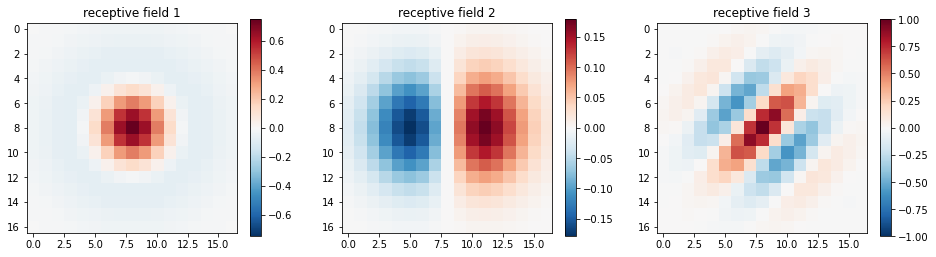

In [8]:
# the first kernel

#DOG receptive field which is difference of two Gaussians 
x = np.tile(np.arange(-8,9),(17,1))
y = x.T 
s1=2
s2=4
kernel1 = np.exp(-(x*x+y*y)/(2*s1**2))-0.25*np.exp(-(x*x+y*y)/(2*s2**2))

# the second kernel

# simple Simple Cell Model
s1=3
kernel2 = np.exp(-(x*x+y*y)/(2*s1**2))*np.sin(x/10)

# the third kernel

#Simple Cell Model
s1=3
kernel3 = np.exp(-(x*x+y*y)/(2*s1**2))*np.cos((x.T/1.5+np.cos(np.pi/4)*y[:,0]))

# plot the kernels
plt.figure(figsize=(16,4))
for i,kernel in enumerate((kernel1,kernel2,kernel3)):
    plt.subplot(1,3,i+1)
    maxv = np.max((np.abs(np.min(kernel)), np.max(kernel)))
    plt.imshow(kernel, cmap=plt.cm.RdBu_r, vmin=-maxv, vmax=maxv)
    plt.colorbar()
    plt.title('receptive field {}'.format(i+1))


<div class="alert alert-info" role="alert">
<h1>Exercise 3a)</h1>
<p>
Describe the three receptive fields shown above. State which cell type each receptive field best matches, and where in the visual system these cells are found. Which feature in an image most strongly excites each cell type, and which features yield the weakest response?
    (12 points)
</p>
</div>

### Receptive field 1
This a model of **Difference of Gaussians (DoG) Receptive Field** which are retinal receptive fields best described by the difference of two Gaussians - surround and centre. In the implementation, the surround Gaussian is subtracted from the centre Gaussian. These two Gaussian functions, when plotted as weight against position, have different width i.e., different standard deviation. The function can capture the “Mexican hat” shape of retinal ganglion cell receptive fields reasonably well. The ganglion cells are **found in the retina** and are useful for spatial filtering and emphasises contours in the images seen. 


If we look at three stimuli centered at the receptive field of the same neuron, the centre of the cell responds very strongly when light is shown. When the light is shown to only the ring around the centre ( middle is kept dark ), a suppression of the response is recorded. When the aforementioned two stimuli are added together, the cell responds and fires but, not as much as when the light is only shown on the centre. This leads to the idea of centre-surround structure of the receptive field. Therefore, **the centre excites the cell while the surround inhibits the cell**. 

### Receptive field (RF) 2 and 3

These cell models are found in the primary visual cortex (V1). Here, a 2D receptive field is described by a single equation which gives the response of the receptive field for any pixel location in the receptive field. The equation in the implementation is called a Gabor wavelet. This funcion can be a sine or a cosine function. They are more tuned to finding spacial contours, and not just transitions of contrast in any direction.  

In RF 2, it is a sine function which gives rise to the osciallation. The angle appears to be around 90 degrees which comes from the argument of the sine fuction. This angle determines the angle of orientation of the selectivity. There is a positive and negative selectivity which comes from the sine function. This function is then multiplied by the Gaussian function which allows the senstivity to be high in the centre and drops off as we go to the sides. That means, similar to the DOG kernel, the centre excites the cell whereas the surrounding inhibits the cell. These cells are sensitive to a particular orientation of the cells. In this case, the stimulus orientation which will lead to highest spikes would be around 90 degrees. 

It turns out there are a whole variety of simple cells in V1. There are two parameters, one is the size of the whole field (the Gaussian), and the other the frequency (in the cosine). The latter gives cells sensitivity to different spatial detail, and the former determines where in the visual field the cell is excitable. Since there are multiple peaks of the cosine function, that’s a cell responding to fine spatial detail, but with a larger receptive field.
Apart from that, RF 3 functions similarly to RF 2 except that a cosine function is used and the function's/ Gabor wave's period is greater than in RF 2. 
While it is similar to the DOG kernel in terms of the dark and light areas sensitivity, RF 3 is most sensitive to a stimulus orientation of around 45 degrees in space. 

Similar to the DOG function, when light is shown on the furthermost surrounding, dark areas from the centre, the cell will respond the weakest. In terms of the spatial orientation, when the stimulus is 90 degrees to the angle of the respective receptive field, the cell response will be the weakest.




<div class="alert alert-info" role="alert">
<h1>Exercise 3b)</h1>
<p>
    Now test your intuition by computing the responses of these neurons to a natural image. To this end we assume we have as many neurons as pixels in the image, and the centre locations of the receptive fields match the pixel locations. Then we can use a simple convolution operation to predict the response of each neuron.
    
Show the predicted responses for each receptive field. Use an appropriate colour scale (use a diverging colormap with the zero clearly visible, as above), to indicate positive and negative responses.
    
Note most of the code for the first kernel has been given for you. You need to consider the colour scale and produce visualisations for the other two kernels.
    (5 points)
</p>
</div>

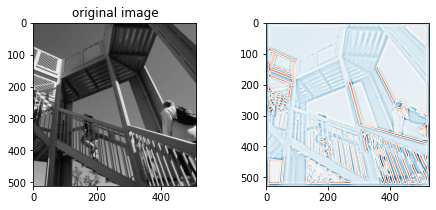

In [9]:
# here we use the 2D convolution function in scipy
from scipy.signal import convolve2d

# and now get a test image
from scipy import misc

# The test image as a 2D matrix:
image = misc.ascent()

# to see the original image, use:
plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
plt.imshow(misc.ascent(),cmap=plt.cm.gray)
plt.title('original image')

# the result for the first receptive field
# note the colour scale may be incorrect
plt.subplot(1,4,2)
conv = convolve2d(image,kernel1)
plt.imshow(conv,cmap=plt.cm.RdBu_r);

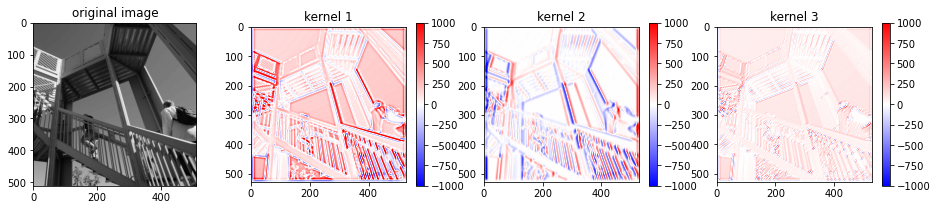

In [10]:
# my answer here:

# to see the original image, use:
plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
plt.imshow(misc.ascent(),cmap=plt.cm.gray)
plt.title('original image')

# the result for the first receptive field
plt.subplot(1,4,2)
conv1 = convolve2d(image,kernel1)
plt.imshow(conv1,cmap=plt.cm.bwr, vmin=-1000, vmax=1000 )
plt.colorbar()
plt.title('kernel 1')

# the result for the second receptive field
plt.subplot(1,4,3)
conv2 = convolve2d(image,kernel2)
plt.imshow(conv2,cmap=plt.cm.bwr, vmin=-1000, vmax=1000)
plt.colorbar()
plt.title('kernel 2')

# the result for the third receptive field
plt.subplot(1,4,4)
conv3 = convolve2d(image,kernel3)
plt.imshow(conv3,cmap=plt.cm.bwr, vmin=-1000, vmax=1000)
plt.colorbar()
plt.title('kernel 3');

Choice of colourmap and colour scale -

I did not choose seismic because it has a noticeably darker gray on one side than the other and therefore are not very symmetric. Coolwarm has little range of gray scale and would print to a more uniform plot, losing a lot of detail. 
In the other options, the kernel3 did not respond well (the picture appeared significantly and uniformly light). So I settled with bwr for all three kernels to allow for comparison and less variable factors to consider.



<div class="alert alert-info" role="alert">
<h1>Exercise 3c)</h1>
<p>
Describe and explain your results. Are the receptive fields indeed selective to the image features you predicted above? Why do neurons in the visual system respond in this way? (8 points)
</p>
</div>

The genral trend is that red reveals information where it is light in the original image while the blue reveals where information was in low light conditions in the original image. The colour is uniform for smooth surfaces without any changes in contrast. 


### Kernel 1
When the pixels in the image are reweighted by kernel 1, the image is compressed into lower levels of actvity because only changes in contrast lead to responses and uniform surfaces are essentially ignored by the receptive field. Uniform surfaces do not contain any information like the sky for example, in the original picture so those details are not captured but, the transitions/ changes in space are. 
In terms of the neurons, when we see the image, the spiking is essentially 0 when we see the background of the original image. The neurons respond this way because it saves energy. Spiking and transmitting information to other neurons is an expensive task. This is a biological energy saving mechanism where only pertinent information is transmitted. The DOG kernel mimics one of the important operating principles of transferring information in the brain using compression. Therefore, the receptive fields are indeed selective to the image features predicted. 

### Kernel 2
Similar to Kernel 1, the changes/ transitions will be highlighted. However, the convoluted image after kernel 2 is applied is also sensitive to spacial orientation. So, the cell is sensitive to vertical structures and we see responses only for vertical structures. The structures in other angles/ orientation do not illicit any responses. The receptive fields are indeed selective to the image features predicted above because the orientation of the field was around 90 degrees and only vertical features are highlighted in the image after convolution function.
Our visual cortex has many of these of these cells in different orientation so we will get many of these convolved images and they all will look very different because they look at different orientations. Combining them together helps us put together the final image. 

### Kernel 3
Similar to Kernel 2, the changes/ transitions will be highlighted. Once again, as predicted, the cell will be sensitive to spacial orientation of the stimulus. Since the orientation is diagonal (around 45 degrees), all structure with this orientation will be highlighted after convolution. In our biological neurons, the firing rate will be maximum when structures are aligned to the orientation of the cell, diagonal in this case. They respond this way because they are senstive to the direction of the stimulus. The response in the convoluted image matches the expectation because other structure contours ( like the human figures ) are not enhanced. Infact, kernel 3 captures more fine spatial detail in its orientation than kernel 2 in its respective orientation. This is because kernel 3 has a larger recepitive field.  

Regarding simple cells model in kernel 2 and 3, the existence of these cells and similar behavior in Macaque Monkeys are also note in the following research paper - https://pubmed.ncbi.nlm.nih.gov/12091567/


# Part 4
## An associative memory model. (32 points)

Here you will simulate the Hopfield model of auto-associative memory.

This model simulates $M$ binary neurons with the following activity rule:

$$
\begin{eqnarray*}
s_{i}(t+1) & = & \Theta\left(\sum_{j=1}^{M}w_{ij}s_{j}(t)-\theta_{i}\right)\\
\Theta(a) & = & \begin{cases}
1 & a\geq0\\
0 & a<0
\end{cases}
\end{eqnarray*}
$$

The variable $s_i(t)$ is the activity of neuron $i$ at time $t$, and $w_{ij}$ is a weight connecting neurons $i$ and $j$. In the following we set the bias $\theta_{i}=1$.

The following learning rule is used to store a set of $N$ binary patterns $p_i^n\in\{0,1\}$ in this network:

$$w_{ij} = \frac{1}{N} \sum_{n=1}^N (p^n_{i}-s)(p^n_{j}-s)$$

The quantity $s$ is the sparseness of the patterns, which is the fractio of elements in the patterns that are 1. So if a pattern of length 20 contains 10 times the '0' and 10 times '1', $s=0.5$.

In other words, sparseness is the arithmentic mean (average) over all patterns: $s=<p^n>_N$.

An excellent summary of the Hopfield network is in chapter 42 in the following textbook (free online):
*MacKay, D. J. C. (2003). [Information Theory, Inference, and Learning Algorithms](http://www.inference.org.uk/mackay/itila/)*

<div class="alert alert-info" role="alert">
<h1>Exercise 4a)</h1>
<p>To compute the similarity between stored and recalled patterns we need an appropriate distance measure. Here we use the Dice coefficient as a distance, defined as follows:

$$
D(p_1,p_2) = 1-\frac{2 |p_1 p_2|}{|p_1|+|p_2|}
$$

Here $|x|$ is the norm of the vector $x$, which for binary vectors with $0/1$ elements is the sum of the elements.

Using the function `dice()` from scipy (imported above), compute and print this value for the following pairs of binary vectors:
```
1. [0 0 1 1] [1 1 0 0]
2. [1 0 1 1] [1 1 0 0]
3. [1 1 0 1] [1 1 0 0]
4. [1 1 0 0] [1 1 0 0]
```

(2 points)
</p>
</div>

In [11]:
# function to compute the Dice coefficient
from scipy.spatial.distance import dice

In [33]:
# YOUR CODE HERE
pair1 = dice([0, 0, 1, 1], [1, 1, 0, 0])
pair2 = dice([1, 0, 1, 1], [1, 1, 0, 0])
pair3 = dice([1, 1, 0, 1], [1, 1, 0, 0])
pair4 = dice([1, 1, 0, 0], [1, 1, 0, 0])
print("The similarity value between stored and recalled patters for the pairs 1-4 are", pair1,",", pair2,
      ",", pair3,",", pair4)

The similarity value between stored and recalled patters for the pairs 1-4 are 1.0 , 0.6 , 0.2 , 0.0


<div class="alert alert-info" role="alert">
<h1>Exercise 4b)</h1>
<p>Explain, in your own words, what this measure computes, and how we can interpret the values when comparing binary 0/1 activity patterns of neurons. Under which condition(s) is this measure not an accurate distance? (5 points)
</p>
</div>

This measure computes the dissimilarity between the stored networks and recalled networks. If learning has been done correctly, the recalled network must converge and match the stored network. 
The range of values outputted vary from 1 to 0. Since, the formula does 1 - ( some number )$\frac{2 |p_1 p_2|}{|p_1|+|p_2|}$, the output will be 0 when both network patterns are similar i.e., 1-1 = 0. This is the case with the pair4 case. When the two patterns are furthest from being similar/ very different, the output will be 1 ( as seen in pair1 ). The closer the result to 0, the better the performance of the Hopfield model of auto-associative memory. 

However, the dice computes dissimilarity between only two 2D arrays and fails when more than 2 arrays are inputted to the function. This does not run in line with the large capacity of the brain since it scales linearly with the number of neurons i.e., 2xneurons = 2xpatterns stored and 2x the similarities to compute. 

Another failure occurs when the activity patterns are not binary. For eg, we would expect the result to be 0 for dice([1, 1, 0, 9], [1, 1, 0, 9]) but the result is -6.545454545454546. Therefore, the constraint is that the two 1D arrays must be which is not entirely how the neurons in the brain work and is highly simplified. 

<div class="alert alert-info" role="alert">
<h1>Exercise 4c)</h1>
<p>Next, we need to create activity patterns to store in the network. As explained in MacKay's book, the network capacity is high if patterns are sparse (if they contain more 0's than 1's). Explain what the following function computes. You can use code to explain your answers. (3 points)
</p>
</div>
 

In [58]:
def make_patterns(N, M, s=.5):
    np.random.seed(42)
    return ((-np.sign(np.random.rand(N,M)-s)+1)/2).astype(int)

#make_patterns(5, 2, s=1)
#make_patterns(5, 2, s=.5)

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

The following function makes N binary patterns of size M since there are M neurons being simulated by function which are then stored in. 
The result is centered around the sparseness which tells us the average activity in the patterns presented. The capacity of this network will be 0.138M if 0/1 have equal probability in each pattern (s = 0.5). As observed by running make_patterns(5, 2, s=0.5), mostly half the neurons will be 0 and other half 1. This is further seen if the s = 1, running make_patterns(5, 2, s=1) meanings all the neurons will have activity of 1 which cab be seen from the result.

It is more realistic to have s < 0.5 since it is rarely the case that half of all neurons are active at the same time.

<div class="alert alert-info" role="alert">
<h1>Exercise 4d)</h1>
<p>Now explain the following code block. (4 points)
</p>
</div>
 

In [73]:
N = 5
M = 100
M = 5
sparseness = .3
patterns = make_patterns(N, M, s=sparseness)

w = np.zeros((M,M))
for p in patterns:
    w += np.outer(p-sparseness, p-sparseness)
w = w/N

#print(w) #presents all the learned weights useful for the 4e

This is simulating a simple Hebbian plasticity rule which says that if neurons fire together, then their connection will be strengthened. In np.outer(i,j), if neurons i and j fire together ( both are 1), we get a positive contribution to the weight and that weight will be strengthened. Since the sparseness has been reduced ( s < 0.5) , the capacity has increased as seen by M ( the number of neurons ) making the model more realistic. 

First, the patterns are made ready to be presented to the network. Next, the code implements the way the weights will be learned. For each weight in the N patterns of size M, the outer product is computed. This computation is a product in one particular pattern between activation of receiving and target neuron and that simulates a correlation essentially. And, we iterate over all patterns and divide the weights by the number of patterns N resulting in an average correlation. 

In a nutshell, the code computes all the weights needed in the network in one go. 

<div class="alert alert-info" role="alert">
<h1>Exercise 4e)</h1>
<p>Finally explain the following code block and its output (note the first part is code from above copied over). (7 points)
</p>
</div>
 

In [74]:
# as above:
N = 5 # number of patterns
M = 100 # number of neurons
sparseness = .3
patterns = make_patterns(N, M, s=sparseness)

w = np.zeros((M,M))
for p in patterns:
    w += np.outer(p-sparseness, p-sparseness)
w = w/N

# new code:
bias = .5 # theta
T = 10 # number of time steps

np.random.seed(42)
s = np.round(np.random.rand(M)).astype(int)
s[:M//2] = patterns[0,:M//2]
dice_coeff = []
for t in range(T):
    s = (0.5 + 0.5 * np.sign((w @ s) - bias)).astype(int)
    dice_coeff.append(dice(s,patterns[0]))
print(dice_coeff)

[0.0967741935483871, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Once the patterns are stored, they can be fed to the activity rule under the "#new code". The learned patterns will be presented and see if the network converges. 
This is done by computing a network of M binary (McCulloch-Pitts) neurons s connected by weights w. 
For each time step, the incoming activations of other neurons (s) is multiplied by weights (w). A bias is introduced which determines the average activity. 
The network is fed some partial initial configuration ( done by s[:M//2]) and then after 10 time steps, the network will eventually settle to a fixed point. This is the kind of behaviour we expect since memory recall must be a stable pattern in such a network.
The resulting pattern of the neuron (s) is then compared to the patterns stored in the network by computing the similarity using the dice coefficient. 
From the results, we can interpret that network performed well almost all the time, since the dissimilarity is 0 i.e., the network was able to recall the same pattern despite being fed just a part of the original pattern. 

The stability in this network is modelled by ensuring the weights are symmetric i.e., the arguments of np.outer in np.outer(p-sparseness, p-sparseness) should be the same. By enforcing this stability, the network has retrieved stored memory as a pattern accurately except in the first round. 

<div class="alert alert-info" role="alert">
<h1>Exercise 4f)</h1>
<p>The code above provides all functions you need to test how many patterns this network can store. Write the code below to assess this in a network of 100 neurons, input sparseness 0.3, 10 time steps for the dynamics, and a bias of 0.5. Test the network with 1 up to 30 patterns.
    
Do do this, use the following strategy:
    
1. Create a set of patterns. To make the code repducible, please always fix the random seed before call number generator (`np.random.seed(1)`).
2. Store these patterns in the network.
3. Test if the patterns are recalled by initialising the network with the pattern. Then run the dynamics for 10 time steps. Take the final activations and evaluate the dice distance between network state and pattern.
4. Repeat 3 for all patterns and collect the dice distances.
5. Report the mean dice distance
6. Repeat this whole procedure for a different number of patterns.
    
The output of the program should be the average dice distance for each pattern set. In the cell below the code, comment on your results. (5 points)
</p>
</div>
 

In [131]:
#M = 100 # number of neurons
#T = 10 # number of time steps
#bias = .5
#sparseness = 0.3
# for N in range(1,31,1):
# YOUR CODE HERE


M = 100 # number of neurons
T = 10 # number of time steps
bias = .5
sparseness = 0.3

np.random.seed(1)
for N in range(1,31,1):
    
    patterns = make_patterns(N, M, s=sparseness)
    
    w = np.zeros((M,M))
    for p in patterns:
        w += np.outer(p-sparseness, p-sparseness)
    w = w/N
    
    s = np.round(np.random.rand(M)).astype(int)
    s[:M//2] = patterns[0,:M//2]
    dice_coeff = []
    for t in range(T):
        s = (0.5 + 0.5 * np.sign((w @ s) - bias)).astype(int)
        dice_coeff.append(dice(s,patterns[0]))
    print(np.mean(dice_coeff))


0.0
0.0
0.0
0.0
0.0
0.0030303030303030303
0.029939637826961775
0.0
0.015900621118012423
0.0030303030303030303
0.4941206090819935
0.014052287581699347
0.039469929762949954
0.20162547084312782
0.09119318181818183
0.08051619695857523
0.22221697073858632
0.16055407095929103
0.22462087421944688
0.19192615121526538
0.29534948482316903
0.36
0.2618421052631579
0.3031168831168831
0.28547378547378544
0.22033898305084745
0.32573778422835026
0.6524242424242426
0.39622641509433965
0.8878524884844399


From the results, up to 10 patterns can be stored and recalled with a very small error rate. According to David MacKay's book, as the sparseness decreases, the capacity increases. However, as we try to store more number of patterns, the error rate in retrieving a stored pattern also increases linearly. 

<div class="alert alert-info" role="alert">
<h1>Exercise 4g)</h1>
<p>
There is good evidence that the brain makes use of associative memories. The Hopfield network is a simple model of such a memory system, and as such can be used to help the study of memory in the brain. First, examine which aspects of this model are biologically plausible, and which are not. Next, list which experimentally testable predictions you can derive from the Hopfield model simulations. Comment on the type of experiment or measurement that would be required to test these predictions. (6 points)
</p>
</div>
 

According to https://www.inference.org.uk/itprnn/book.pdf :

One way in which we viewed learning in the single neuron was as communication – communication of the labels of the training data set from one point in time to a later point in time. Similarly, we might view the Hopfield associative memory as a communication channel - a list of desired memories is encoded into a set of weights W using the Hebb rule of equation. This communication system can fail in various ways to capture biological functions of our brains:

1. Individual bits in some memories might be corrupted, that is, a stable state of the Hopfield network is displaced a little from the desired memory.
2. Entire memories might be absent from the list of attractors of the network; or a stable state might be present but have such a small basin of attraction that it is of no use for pattern completion and error correction.
3. Spurious additional memories unrelated to the desired memories might be present.
4. Spurious additional memories derived from the desired memories by operations such as mixing and inversion may also be present.

Of these failure modes, modes 1 and 2 are clearly undesirable, mode 2 especially so. Mode 3 might not matter so much as long as each of the desired memories has a large basin of attraction. The fourth failure mode might in some contexts actually be viewed as beneficial. For example, if a network is required to memorize examples of valid sentences such as ‘John loves Mary’ and ‘John gets cake’, we might be happy to find that ‘John loves cake’ was also a stable state of the network. We might call this behaviour ‘generalization’.
Another aspect of this model that is biologically plausible is the synaptic plasticity which is the neural basis of memory and learning.


Experimentally testable predictions that can be derived from the Hopfield model simulations:
The capacities discussed in this assignment are the capacities of the Hopfield network whose weights are set using the Hebbian learning rule. We can do better than the Hebb rule by defining an objective function that measures how well the network stores all the memories, and minimizing it.